# IRIS Case Study

Dataset used in this study is a multivariate dataset which contain 50 observations for various features of 3 different species of Iris plant i.e. 'Iris-setosa', 'Iris-versicolor','Iris-virginica'. 

### Understanding the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing the dataset
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check the dimensions of the dataframe
iris_df.shape

(150, 5)

In [5]:
# see the type of each column
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# look at the statistical aspects of the dataframe
iris_df.describe(include = "all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Checking for Duplicates

In [8]:
# Checking the duplicate values
duplicatevalues =iris_df.duplicated()
iris_df[duplicatevalues]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
iris_df.duplicated().sum()

3

In [10]:
# Dropping the duplicates
iris_df.drop_duplicates(inplace = True)

In [11]:
iris_df.duplicated().sum()

0

### Checking for Null values


In [12]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Checking the Outliers

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Checking for outliers in the continuous variables
num_df = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

In [15]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
90%,6.900000,3.640000,5.800000,2.200000
95%,7.270000,3.800000,6.100000,2.300000
99%,7.700000,4.154000,6.700000,2.500000


<AxesSubplot:>

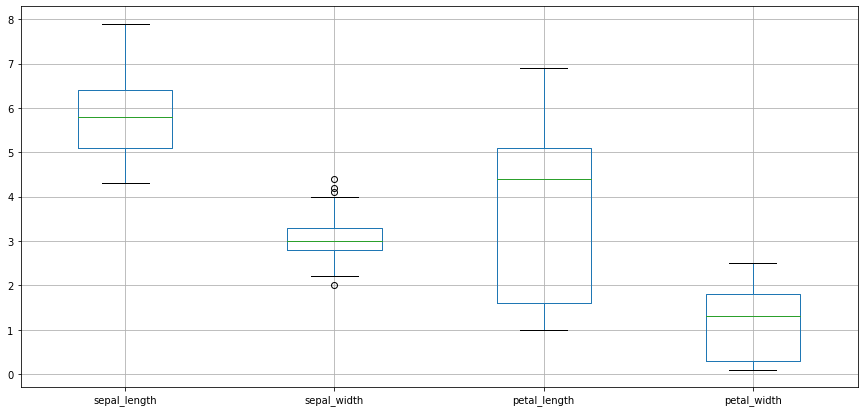

In [16]:
plt.figure(figsize=(15,7))
iris_df[['sepal_length','sepal_width','petal_length','petal_width']].boxplot()

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for feature in iris_df[['sepal_length','sepal_width','petal_length','petal_width']]: 
    lr,ur=remove_outlier(iris_df[feature])
    iris_df[feature]=np.where(iris_df[feature]>ur,ur,iris_df[feature])
    iris_df[feature]=np.where(iris_df[feature]<lr,lr,iris_df[feature])

<AxesSubplot:>

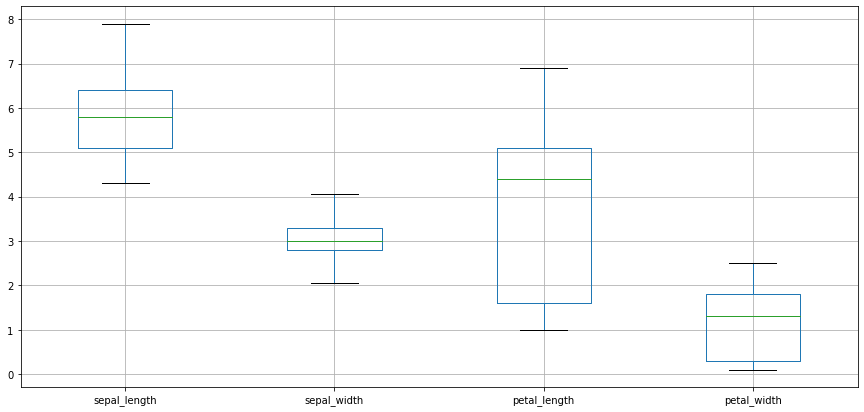

In [19]:
plt.figure(figsize=(15,7))
iris_df[['sepal_length','sepal_width','petal_length','petal_width']].boxplot()

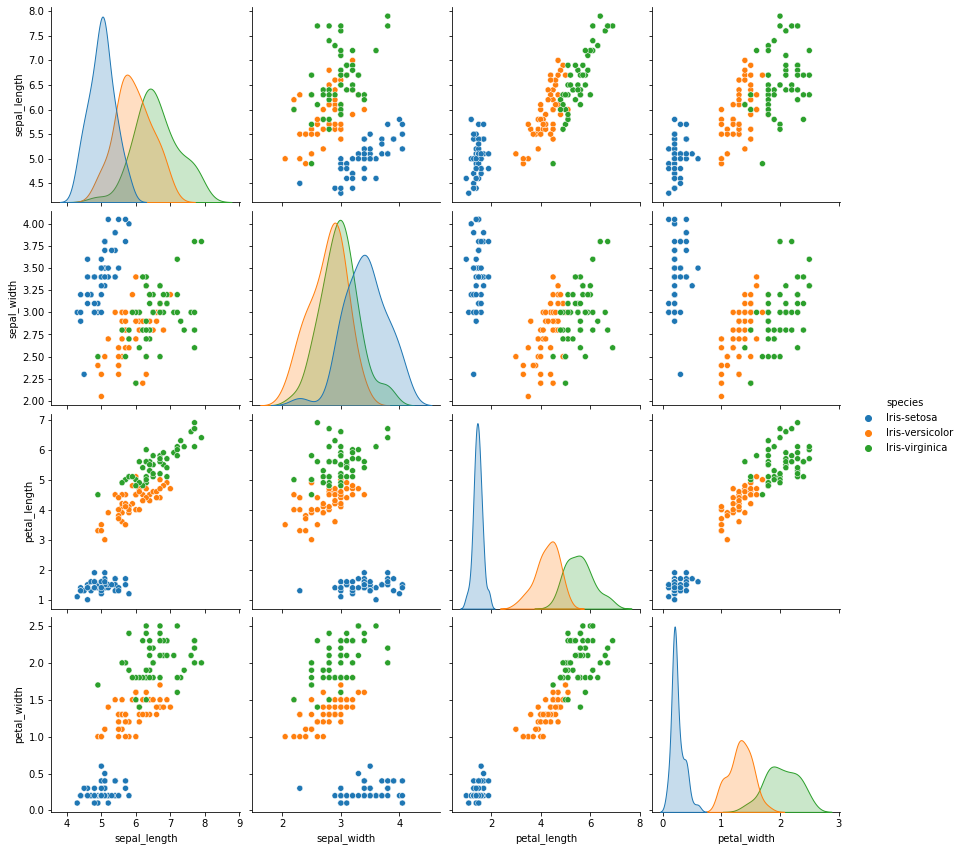

In [20]:
sns.pairplot(data = iris_df,hue="species", size = 3)

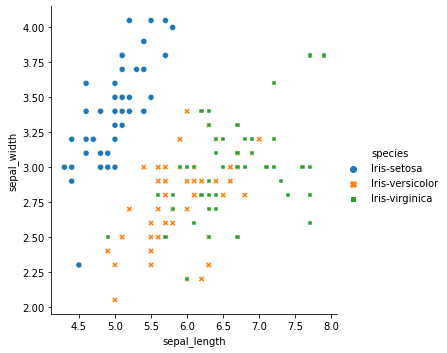

In [21]:
sns.relplot(x="sepal_length", y="sepal_width", data = iris_df ,hue='species',style='species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

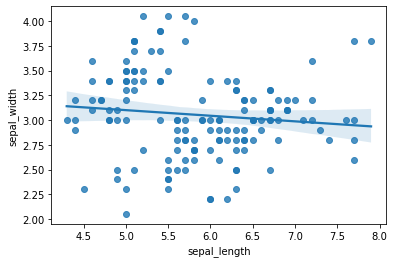

In [22]:
sns.regplot(x="sepal_length", y="sepal_width", data = iris_df)

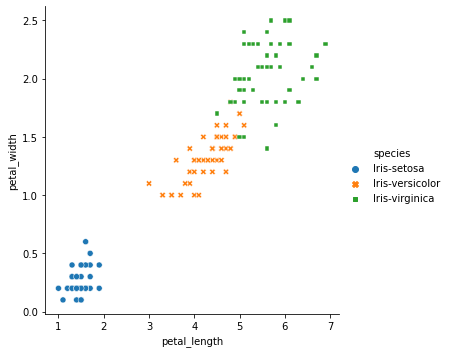

In [23]:
sns.relplot(x="petal_length", y="petal_width", data = iris_df ,hue='species',style='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

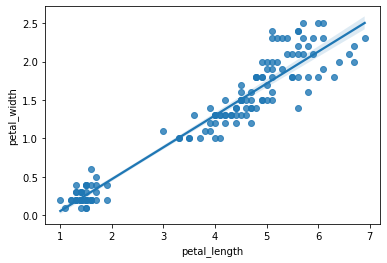

In [24]:
sns.regplot(x="petal_length", y="petal_width", data = iris_df )

### Checking correlations

In [25]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.110155,0.871305,0.817058
sepal_width,-0.110155,1.000000,-0.420140,-0.355139
petal_length,0.871305,-0.420140,1.000000,0.961883
petal_width,0.817058,-0.355139,0.961883,1.000000


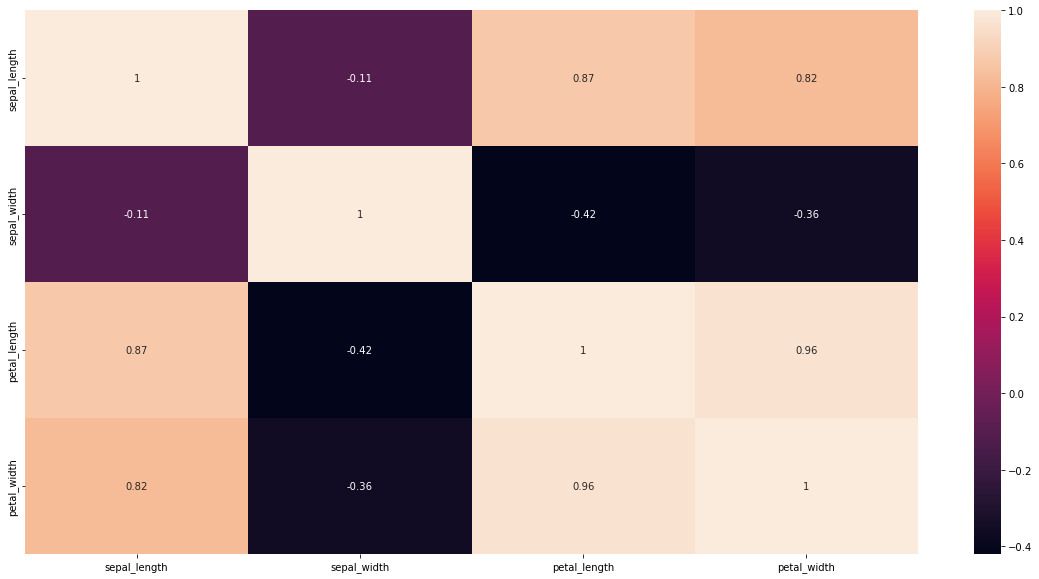

In [26]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(iris_df.corr(),annot = True)
plt.show()

In [27]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
iris_df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [29]:
iris_df.species = iris_df.species.replace(to_replace=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], value=[0, 1,2])

In [30]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

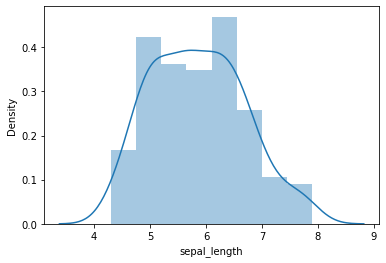

In [31]:
sns.distplot(iris_df['sepal_length'])

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

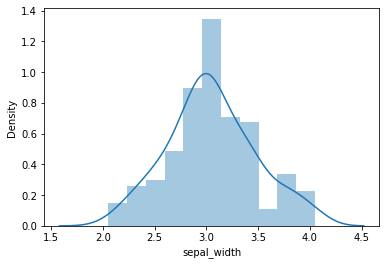

In [32]:
sns.distplot(iris_df['sepal_width'])

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

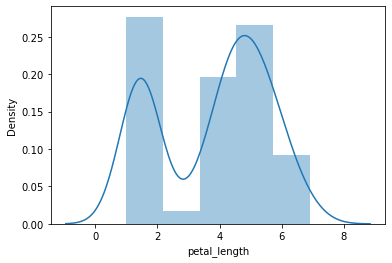

In [33]:
sns.distplot(iris_df['petal_length'])

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

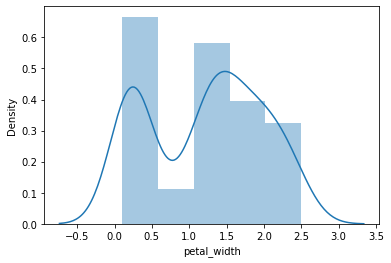

In [34]:
sns.distplot(iris_df['petal_width'])

iris_df.loc[iris_df['petal_width'].between(0, 1.0, 'both'), 'petal_width_range'] = 1
iris_df.loc[iris_df['petal_width'].between(1.0, 1.75, 'right'), 'petal_width_range'] = 2
iris_df.loc[iris_df['petal_width'].between(1.75, 2.5, 'right'), 'petal_width_range'] = 3

In [35]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Generation

In [36]:
iris_df['petal_length/sepal_width'] = iris_df['petal_length'] / iris_df['sepal_width']
iris_df['petal_width/species'] = iris_df['petal_width'] / iris_df['species'].count()
iris_df['sepal_width/sepal_length'] = iris_df['sepal_width'] / iris_df['sepal_length']
iris_df['petal_width/sepal_length'] = iris_df['petal_width'] / iris_df['sepal_length']
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length/sepal_width,petal_width/species,sepal_width/sepal_length,petal_width/sepal_length
0,5.1,3.5,1.4,0.2,0,0.400000,0.001361,0.686275,0.039216
1,4.9,3.0,1.4,0.2,0,0.466667,0.001361,0.612245,0.040816
2,4.7,3.2,1.3,0.2,0,0.406250,0.001361,0.680851,0.042553
3,4.6,3.1,1.5,0.2,0,0.483871,0.001361,0.673913,0.043478
4,5.0,3.6,1.4,0.2,0,0.388889,0.001361,0.720000,0.040000
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.733333,0.015646,0.447761,0.343284
146,6.3,2.5,5.0,1.9,2,2.000000,0.012925,0.396825,0.301587
147,6.5,3.0,5.2,2.0,2,1.733333,0.013605,0.461538,0.307692
148,6.2,3.4,5.4,2.3,2,1.588235,0.015646,0.548387,0.370968


### Feature Reduction

In [37]:
y = iris_df["petal_width"]
X = iris_df.drop(columns=["petal_width"])

In [38]:
X

,sepal_length,sepal_width,petal_length,species,petal_length/sepal_width,petal_width/species,sepal_width/sepal_length,petal_width/sepal_length
0,5.1,3.5,1.4,0,0.400000,0.001361,0.686275,0.039216
1,4.9,3.0,1.4,0,0.466667,0.001361,0.612245,0.040816
2,4.7,3.2,1.3,0,0.406250,0.001361,0.680851,0.042553
3,4.6,3.1,1.5,0,0.483871,0.001361,0.673913,0.043478
4,5.0,3.6,1.4,0,0.388889,0.001361,0.720000,0.040000
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2,1.733333,0.015646,0.447761,0.343284
146,6.3,2.5,5.0,2,2.000000,0.012925,0.396825,0.301587
147,6.5,3.0,5.2,2,1.733333,0.013605,0.461538,0.307692
148,6.2,3.4,5.4,2,1.588235,0.015646,0.548387,0.370968


[0.00074219 0.00058713 0.09401342 0.33124157 0.1943976  0.30934365
 0.0304268  0.03924763]


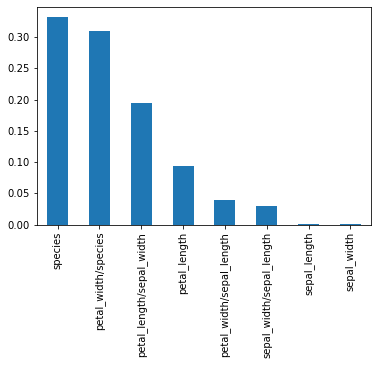

In [337]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor(n_estimators=50)

clf = clf.fit(X, y)
print(clf.feature_importances_)  

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,sepal_width,1356.94
0,sepal_length,830.80
5,petal_width/species,528.15
2,petal_length,504.13
4,petal_length/sepal_width,496.97
6,sepal_width/sepal_length,432.62
7,petal_width/sepal_length,357.24
3,species,39.24


In [40]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [41]:

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,vif,Features
5,445.93,petal_width/species
7,347.12,petal_width/sepal_length
6,233.00,sepal_width/sepal_length
0,203.90,sepal_length
1,129.96,sepal_width
4,110.19,petal_length/sepal_width
2,90.44,petal_length
3,15.77,species


In [42]:
X_new = iris_df[['petal_width/species','petal_width/sepal_length','petal_length/sepal_width','petal_length','species']]

In [43]:
X_scaled_new = scalar.fit_transform(X_new)

In [44]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled_new,i) for i in range(X_scaled_new.shape[1])]
vif["Features"] = X_new.columns

#let's check the values
vif

,vif,Features
0,94.550864,petal_width/species
1,45.279990,petal_width/sepal_length
2,22.700967,petal_length/sepal_width
3,55.146247,petal_length
4,14.175231,species


In [45]:
X_train= iris_df.drop(columns=["petal_width","species","sepal_length","sepal_width/sepal_length","sepal_width"])
y_train= iris_df["petal_width"]

In [46]:
X_train

,petal_length,petal_length/sepal_width,petal_width/species,petal_width/sepal_length
0,1.4,0.400000,0.001361,0.039216
1,1.4,0.466667,0.001361,0.040816
2,1.3,0.406250,0.001361,0.042553
3,1.5,0.483871,0.001361,0.043478
4,1.4,0.388889,0.001361,0.040000
...,...,...,...,...
145,5.2,1.733333,0.015646,0.343284
146,5.0,2.000000,0.012925,0.301587
147,5.2,1.733333,0.013605,0.307692
148,5.4,1.588235,0.015646,0.370968


# Hyperparameters tunning

### 1) Random Forest Regressor

In [47]:

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [48]:
from sklearn.ensemble import RandomForestRegressor


RandomForest_reg = RandomForestRegressor()

RandomForest_reg.fit(X_train, y_train)

y_pred = RandomForest_reg.predict(X_train)

In [49]:
print ('MSE of Random Forest Regressor =',mse(y_pred, y_train))
print ('MAE of Random Forest Regressor =',mae(y_pred, y_train))
print ('R2 score of Random Forest Regressor =',r2_score(y_pred, y_train))

MSE of Random Forest Regressor = 4.2156462585033146e-05
MAE of Random Forest Regressor = 0.0024829931972793853
R2 score of Random Forest Regressor = 0.9999260340139897


###### Grid Parameters (grid_params) for Random Forest
max_depth ==> This parameter deals with the no. of levels in the trees, here
              "min_depth": 20,
               "max_depth": 25,
 
min_samples_leaf ==> This parameter deals with the no. of data points to be allowed in the leaf nodes, here "min_samples_per_leaf_min_value": 5,
            "min_samples_per_leaf_max_value": 10,

n_estimators ==> This parameter deals with the no. of trees in the forest , here 
                 "min_trees": 10,
                 "max_trees": 20,
                 
bootstrap ==> This parameter deals with the method of sampling of data points, here
'feature_sampling_statergy': ['Default'] i.e True

verbose ==>  set parallelism : 0

In [51]:
print(RandomForest_reg.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [52]:
grid_param = {'max_depth': range(20,25)
              ,'min_samples_leaf': range(5,10),
              'n_estimators':[10,20],
              #'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True],
              'verbose': [0]
              
}

In [53]:
from sklearn.model_selection import GridSearchCV , KFold
Random_grid_search = GridSearchCV(estimator= RandomForest_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [54]:
Random_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': range(20, 25),
                         'min_samples_leaf': range(5, 10),
                         'n_estimators': [10, 20], 'verbose': [0]})

In [55]:
print(Random_grid_search.best_params_)

{'bootstrap': True, 'max_depth': 22, 'min_samples_leaf': 5, 'n_estimators': 20, 'verbose': 0}


In [56]:
Randomreg_cv = RandomForestRegressor(bootstrap= True, max_depth= 20, min_samples_leaf= 5, n_estimators = 20)

In [57]:
Randomreg_cv.fit(X_train,y_train)
y_pred = Randomreg_cv.predict(X_train)

In [58]:
print ('MSE of Random Forest Regressor Grid Search=',mse(y_pred, y_train))
print ('MAE of Random Forest Regressor Grid Search =',mae(y_pred, y_train))
print ('R2 score of Random Forest Regressor Grid Search =',r2_score(y_pred, y_train))

MSE of Random Forest Regressor Grid Search= 0.0008595518007739127
MAE of Random Forest Regressor Grid Search = 0.01909825437162028
R2 score of Random Forest Regressor Grid Search = 0.9984801006063517


### 2) Gradient Boosted Trees Regressor

In [349]:
from sklearn.ensemble import GradientBoostingRegressor

GBT_reg = GradientBoostingRegressor()

GBT_reg.fit(X_train, y_train)

y_pred = GBT_reg.predict(X_train)

In [350]:
print ('MSE of GBT Regressor =',mse(y_pred, y_train))
print ('MAE of GBT Regressor =',mae(y_pred, y_train))
print ('R2 score of GBT Regressor =',r2_score(y_pred, y_train))

MSE of GBT Regressor = 2.4130513053468492e-09
MAE of GBT Regressor = 2.8426309765562547e-05
R2 score of GBT Regressor = 0.9999999957697688


In [351]:
print(GBT_reg.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [352]:
#lad represents least absolute deviation

In [353]:
grid_param = {'max_depth': range(5,7)
              ,'subsample':[1,2],
              'n_estimators':[67,89],
              'loss':['lad'],
              'learning_rate':[0.1,0.5],
              'n_iter_no_change': range(20,40),
              'verbose': [0]
              
}

In [354]:
from sklearn.model_selection import GridSearchCV , KFold
GBT_grid_search = GridSearchCV(estimator= GBT_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [355]:
GBT_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5], 'loss': ['lad'],
                         'max_depth': range(5, 7), 'n_estimators': [67, 89],
                         'n_iter_no_change': range(20, 40), 'subsample': [1, 2],
                         'verbose': [0]})

In [356]:
print(GBT_grid_search.best_params_)

{'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 89, 'n_iter_no_change': 31, 'subsample': 1, 'verbose': 0}


In [357]:
GBTreg_cv = GradientBoostingRegressor(learning_rate= 0.1, loss= 'lad', max_depth= 6, n_estimators= 89,n_iter_no_change= 38, subsample= 1, verbose= 0)

In [358]:
GBTreg_cv.fit(X_train,y_train)
y_pred = GBTreg_cv.predict(X_train)

In [359]:
print ('MSE of GBT Regressor Grid Search=',mse(y_pred, y_train))
print ('MAE of GBT Regressor Grid Search =',mae(y_pred, y_train))
print ('R2 score of GBT Regressor Grid Search =',r2_score(y_pred, y_train))

MSE of GBT Regressor Grid Search= 0.001315957410070323
MAE of GBT Regressor Grid Search = 0.010461915741645018
R2 score of GBT Regressor Grid Search = 0.997610017274026


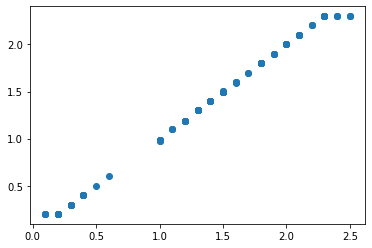

In [361]:
plt.scatter(y_train,y_pred)

### 3) Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

In [137]:
print ('MSE of Linear Regression =',mse(y_pred, y_train))
print ('MAE of Linear Regression =',mae(y_pred, y_train))
print ('R2 score of Linear Regression =',r2_score(y_pred, y_train))

MSE of Linear Regression = 1.0503104807190656e-30
MAE of Linear Regression = 7.516663028967259e-16
R2 score of Linear Regression = 1.0


In [138]:
print(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


grid_param = {'elasticNetParam':[0.5,0.8],
              'regParam':[0.5,0.8],
              'fit_intercept':[True]
              
}

from sklearn.model_selection import GridSearchCV , KFold
lr_grid_search = GridSearchCV(estimator= lr,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

print(lr_grid_search.best_params_)

### Ridge Regression

In [198]:
from sklearn.linear_model import Ridge

Rid_reg = Ridge()

Rid_reg.fit(X_train, y_train)

y_pred = Rid_reg.predict(X_train)

In [199]:
print ('MSE of Ridge Regression =',mse(y_pred, y_train))
print ('MAE of Ridge Regression =',mae(y_pred, y_train))
print ('R2 score of Ridge Regression =',r2_score(y_pred, y_train))

MSE of Ridge Regression = 0.027902461373732892
MAE of Ridge Regression = 0.12838046928647762
R2 score of Ridge Regression = 0.9471643177260383


In [200]:
print(Rid_reg.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [201]:
grid_param = {'max_iter':[30,50],
            
              'alpha':[0.5,0.8],
              'fit_intercept':[True]
              
}

In [202]:
from sklearn.model_selection import GridSearchCV , KFold
Ridreg_grid_search = GridSearchCV(estimator= Rid_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [203]:
Ridreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.8], 'fit_intercept': [True],
                         'max_iter': [30, 50]})

In [204]:
print(Ridreg_grid_search.best_params_)

{'alpha': 0.5, 'fit_intercept': True, 'max_iter': 30}


In [205]:
Ridgereg_cv = Ridge(alpha=0.5, fit_intercept = True, max_iter = 30)

In [206]:
Ridgereg_cv.fit(X_train,y_train)
y_pred = Ridgereg_cv.predict(X_train)

In [207]:
print ('MSE of Ridge Regression =',mse(y_pred, y_train))
print ('MAE of Ridge Regression =',mae(y_pred, y_train))
print ('R2 score of Ridge Regression =',r2_score(y_pred, y_train))

MSE of Ridge Regression = 0.021266149823727085
MAE of Ridge Regression = 0.11187297069922665
R2 score of Ridge Regression = 0.9600508492169225


### Lasso Regression

In [259]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_train)

In [260]:
print ('MSE of Lasso Regression =',mse(y_pred, y_train))
print ('MAE of Lasso Regression =',mae(y_pred, y_train))
print ('R2 score of Lasso Regression =',r2_score(y_pred, y_train))

MSE of Lasso Regression = 0.36803074381896134
MAE of Lasso Regression = 0.5170709757674834
R2 score of Lasso Regression = -14.105484825469308


In [261]:
print(lasso_reg.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [266]:
grid_param = {'max_iter':[30,50],
             'fit_intercept':[True],
              'alpha':[0.5,0.8]
              
              
}

In [267]:
from sklearn.model_selection import GridSearchCV , KFold
Lassoreg_grid_search = GridSearchCV(estimator= lasso_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [268]:
Lassoreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.8], 'fit_intercept': [True],
                         'max_iter': [30, 50]})

In [269]:
print(Lassoreg_grid_search.best_params_)

{'alpha': 0.5, 'fit_intercept': True, 'max_iter': 30}


In [270]:
Lassoreg_cv = Lasso(alpha=0.5,max_iter = 30)

In [271]:
Lassoreg_cv.fit(X_train,y_train)
y_pred = Lassoreg_cv.predict(X_train)

In [272]:
print ('MSE of Lasso Regression =',mse(y_pred, y_train))
print ('MAE of Lasso Regression =',mae(y_pred, y_train))
print ('R2 score of Lasso Regression =',r2_score(y_pred, y_train))

MSE of Lasso Regression = 0.12400294466836642
MAE of Lasso Regression = 0.2872653750453669
R2 score of Lasso Regression = 0.36324582483969814


### Elastic Net Regression

In [338]:
from sklearn.linear_model import ElasticNet

elastic_reg =ElasticNet()

elastic_reg.fit(X_train, y_train)

y_pred = elastic_reg.predict(X_train)

In [339]:
print ('MSE of ElasticNet Regression =',mse(y_pred, y_train))
print ('MAE of ElasticNet Regression =',mae(y_pred, y_train))
print ('R2 score of ElasticNet Regression =',r2_score(y_pred, y_train))

MSE of ElasticNet Regression = 0.16303690962030512
MAE of ElasticNet Regression = 0.3332135950029681
R2 score of ElasticNet Regression = -0.1317487558488828


In [340]:
print(elastic_reg.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [341]:
grid_param = {'max_iter':[30,50],
             'l1_ratio':[0.5,0.8],
              'alpha':[0.5,0.8],
                      
}

In [342]:
from sklearn.model_selection import GridSearchCV , KFold
elasticnet_grid_search = GridSearchCV(estimator= elastic_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [343]:
elasticnet_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.8], 'l1_ratio': [0.5, 0.8],
                         'max_iter': [30, 50]})

In [344]:
print(elasticnet_grid_search.best_params_)

{'alpha': 0.5, 'l1_ratio': 0.5, 'max_iter': 30}


In [345]:
elasticnet_cv = ElasticNet(alpha=0.5,l1_ratio = 0.5,max_iter = 30)

In [346]:
elasticnet_cv.fit(X_train,y_train)
y_pred = elasticnet_cv.predict(X_train)

In [347]:
print ('MSE of ElasticNet Regression =',mse(y_pred, y_train))
print ('MAE of ElasticNet Regression =',mae(y_pred, y_train))
print ('R2 score of ElasticNet Regression =',r2_score(y_pred, y_train))

MSE of ElasticNet Regression = 0.07745236277410827
MAE of ElasticNet Regression = 0.2222494218823438
R2 score of ElasticNet Regression = 0.7343648811878284


<AxesSubplot:ylabel='Density'>

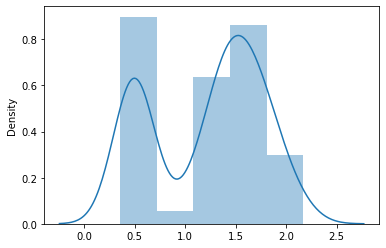

In [348]:
plt.scatter(y_train,y_pred)

### XG Boost

In [518]:
import xgboost as xg

xgboost_reg =xg.XGBRegressor()

xgboost_reg.fit(X_train, y_train)

y_pred = xgboost_reg.predict(X_train)

In [519]:
y_pred

array([0.20007376, 0.20007376, 0.20007376, 0.20007376, 0.20007376,
       0.39994076, 0.2999955 , 0.20007376, 0.20007376, 0.10053714,
       0.20007376, 0.20007376, 0.10053714, 0.10053714, 0.20007376,
       0.39994076, 0.39994076, 0.2999955 , 0.2999955 , 0.2999955 ,
       0.20007376, 0.39994076, 0.20007376, 0.50006366, 0.20007376,
       0.20007376, 0.39994076, 0.20007376, 0.20007376, 0.20007376,
       0.20007376, 0.39994076, 0.10053714, 0.20007376, 0.20007376,
       0.20007376, 0.20007376, 0.20007376, 0.2999955 , 0.2999955 ,
       0.20007376, 0.59996617, 0.39994076, 0.2999955 , 0.20007376,
       0.20007376, 0.20007376, 0.20007376, 1.400107  , 1.4994396 ,
       1.4993601 , 1.3005463 , 1.499055  , 1.3004591 , 1.5988557 ,
       0.9995586 , 1.3004519 , 1.39952   , 0.9995586 , 1.5006151 ,
       0.9995586 , 1.4002819 , 1.3002403 , 1.3999909 , 1.5008286 ,
       0.9995586 , 1.5001191 , 1.1014061 , 1.8000296 , 1.3001305 ,
       1.5003502 , 1.1992306 , 1.3001232 , 1.3999768 , 1.40010

In [520]:
print ('MSE of xgboost Regression =',mse(y_pred, y_train))
print ('MAE of xgboost Regression =',mae(y_pred, y_train))
print ('R2 score of xgboost Regression =',r2_score(y_pred, y_train))

MSE of xgboost Regression = 3.4198469192394853e-07
MAE of xgboost Regression = 0.0003716521522625719
R2 score of xgboost Regression = 0.9999994004367033


In [521]:
print(xgboost_reg.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [524]:
grid_param = {
              'booster': ['gbtree','dart']  ,
               'random_state': [0],
              'colsample_bytree':[0.67],
               'eta':[0.3],
               'seed':[0],
  
               'gamma': [68.0],
              'learning_rate': [89.0, 76.0],
              'max_depth':[56, 89], 
             'min_child_weight': [67],
     #'missing': [np.nan],
              'reg_alpha': [77],
              'reg_lambda' : [78],
             'tree_method': ['exact','auto'],
              'subsample': [0.67],
              
}

In [525]:
from sklearn.model_selection import GridSearchCV , KFold
XGB_grid_search = GridSearchCV(estimator= xgboost_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [526]:
XGB_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    l...
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'dart'],
                         'colsample_bytree': [0.67], 'eta': [0.3],
                         'gamma': [68.0], 

In [527]:
print(XGB_grid_search.best_params_)

{'booster': 'gbtree', 'colsample_bytree': 0.67, 'eta': 0.3, 'gamma': 68.0, 'learning_rate': 89.0, 'max_depth': 56, 'min_child_weight': 67, 'random_state': 0, 'reg_alpha': 77, 'reg_lambda': 78, 'seed': 0, 'subsample': 0.67, 'tree_method': 'exact'}


In [528]:
xgboost_cv =xg.XGBRegressor(booster= 'gbtree', colsample_bytree= 0.67,eta=0.3, gamma= 68.0, learning_rate = 89.0, max_depth = 56, min_child_weight = 67, random_state= 0, reg_alpha = 77, reg_lambda = 78, subsample = 0.67, tree_method= 'exact')

In [529]:
xgboost_cv.fit(X_train,y_train)
y_pred = xgboost_cv.predict(X_train)

In [530]:
y_pred

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan], dtype=float32)

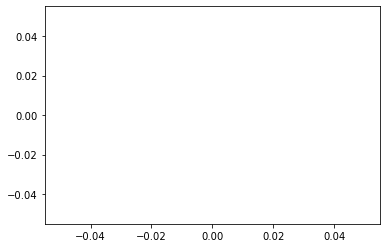

In [492]:
plt.scatter(y_train,y_pred)

In [454]:
print ('MSE of xgboost Regression =',mse(y_pred, y_train))
print ('MAE of xgboost Regression =',mae(y_pred, y_train))
print ('R2 score of xgboost Regression =',r2_score(y_pred, y_train))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Decision Tree Regressor

In [313]:
from sklearn.tree import DecisionTreeRegressor

dectree_reg = DecisionTreeRegressor()

dectree_reg.fit(X_train, y_train)

y_pred = dectree_reg.predict(X_train)

In [314]:
print ('MSE of Decision Tree Regression =',mse(y_pred, y_train))
print ('MAE of Decision Tree Regression =',mae(y_pred, y_train))
print ('R2 score of Decision Tree Regression =',r2_score(y_pred, y_train))

MSE of Decision Tree Regression = 3.4671979624669257e-32
MAE of Decision Tree Regression = 1.0762366055039782e-16
R2 score of Decision Tree Regression = 1.0


In [315]:
print(dectree_reg.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [362]:
grid_param = {'criterion': ['mse'],
             'max_depth':[4,7],
             'min_samples_leaf':[12,6],
             'splitter': ['best','random']
                      
}

In [363]:
from sklearn.model_selection import GridSearchCV , KFold
DTR_grid_search = GridSearchCV(estimator= dectree_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [364]:
DTR_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [4, 7],
                         'min_samples_leaf': [12, 6],
                         'splitter': ['best', 'random']})

In [365]:
print(DTR_grid_search.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 6, 'splitter': 'best'}


In [366]:
DTR_cv = DecisionTreeRegressor(criterion = 'mse', max_depth = 4, min_samples_leaf = 6, splitter = 'best')

In [367]:
DTR_cv.fit(X_train,y_train)
y_pred = DTR_cv.predict(X_train)

In [368]:
print ('MSE of Decision Tree Regression =',mse(y_pred, y_train))
print ('MAE of Decision Tree Regression =',mae(y_pred, y_train))
print ('R2 score of Decision Tree Regression =',r2_score(y_pred, y_train))

MSE of Decision Tree Regression = 0.0021000161969549733
MAE of Decision Tree Regression = 0.03419339164237124
R2 score of Decision Tree Regression = 0.9963051691663877


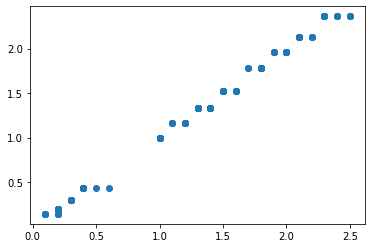

In [370]:
plt.scatter(y_train,y_pred)

### Support Vector Machine

In [383]:
from sklearn import svm

SVM_reg = svm.SVR()

SVM_reg.fit(X_train, y_train)

y_pred = SVM_reg.predict(X_train)

In [384]:
print ('MSE of SVM Regression =',mse(y_pred, y_train))
print ('MAE of SVM Regression =',mae(y_pred, y_train))
print ('R2 score of SVM Regression =',r2_score(y_pred, y_train))

MSE of SVM Regression = 0.030450981584793195
MAE of SVM Regression = 0.13730051583873343
R2 score of SVM Regression = 0.940481798577655


In [385]:
print(SVM_reg.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [388]:
grid_param = {'C': [566.0, 79.0],
              'gamma': [ 'scale','auto'],
              'degree': [3],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'max_iter':[7],
             'tol':[7]
            
                      
}

In [389]:
from sklearn.model_selection import GridSearchCV , KFold
SVM_grid_search = GridSearchCV(estimator= SVM_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [390]:
SVM_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [566.0, 79.0], 'degree': [3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [7], 'tol': [7]})

In [391]:
print(SVM_grid_search.best_params_)

{'C': 566.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 7, 'tol': 7}


In [392]:
SVM_cv = svm.SVR(C = 566.0, degree = 3,gamma = 'scale', kernel = 'linear', max_iter = 7, tol = 7)

In [393]:
SVM_cv.fit(X_train,y_train)
y_pred = SVM_cv.predict(X_train)

In [394]:
print ('MSE of SVM Regression =',mse(y_pred, y_train))
print ('MAE of SVM Regression =',mae(y_pred, y_train))
print ('R2 score of SVM Regression =',r2_score(y_pred, y_train))

MSE of SVM Regression = 0.5787755102040816
MAE of SVM Regression = 0.638095238095238
R2 score of SVM Regression = 0.0


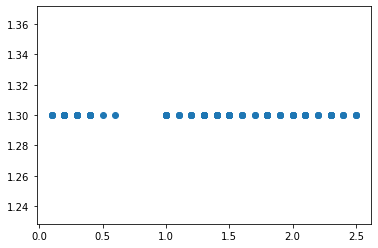

In [395]:
plt.scatter(y_train,y_pred)

### Stochastic Gradient Descent

In [507]:
from sklearn.linear_model import SGDRegressor

SGD_reg = SGDRegressor()

SGD_reg.fit(X_train, y_train)

y_pred = SGD_reg.predict(X_train)

In [508]:
print ('MSE of SGD Regression =',mse(y_pred, y_train))
print ('MAE of SGD Regression =',mae(y_pred, y_train))
print ('R2 score of SGD Regression =',r2_score(y_pred, y_train))

MSE of SGD Regression = 0.048637189750922454
MAE of SGD Regression = 0.17872557089433033
R2 score of SGD Regression = 0.8880191656293537


In [509]:
print(SGD_reg.get_params())

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
grid_param = {
              'alpha':[79,56],
             'tol':[56]
            
                      
}

In [ ]:
from sklearn.model_selection import GridSearchCV , KFold
SVM_grid_search = GridSearchCV(estimator= SGD_reg,
                     param_grid=grid_param,
                     cv= KFold(n_splits=6, random_state=1, shuffle= True ),
                    n_jobs =-1)

In [ ]:
SVM_grid_search.fit(X_train, y_train)

### KNN Regressor

In [628]:
from sklearn.neighbors import KNeighborsRegressor

KNN_reg = KNeighborsRegressor()

KNN_reg.fit(X_train, y_train)

y_pred = KNN_reg.predict(X_train)

In [629]:
print ('MSE of KNN Regression =',mse(y_pred, y_train))
print ('MAE of KNN Regression =',mae(y_pred, y_train))
print ('R2 score of KNN Regression =',r2_score(y_pred, y_train))

MSE of KNN Regression = 0.020995918367346943
MAE of KNN Regression = 0.10965986394557821
R2 score of KNN Regression = 0.961574496663212


In [630]:
print(KNN_reg.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [659]:
KNN_cv = KNeighborsRegressor(algorithm = 'auto',n_neighbors = 78,weights = 'distance')

In [660]:
KNN_cv.fit(X_train,y_train)
y_pred = KNN_cv.predict(X_train)

In [661]:
print ('MSE of KNN Regression =',mse(y_pred, y_train))
print ('MAE of KNN Regression =',mae(y_pred, y_train))
print ('R2 score of KNN Regression =',r2_score(y_pred, y_train))

MSE of KNN Regression = 1.262740518133016e-12
MAE of KNN Regression = 2.8645806422198717e-07
R2 score of KNN Regression = 0.9999999999977864


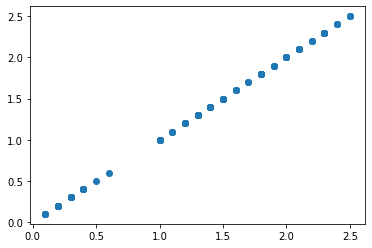

In [662]:
plt.scatter(y_train,y_pred)

### Extra Random Trees

In [665]:
from sklearn.ensemble import ExtraTreesRegressor

ExtraRT = ExtraTreesRegressor().fit(X_train,y_train)

y_pred = ExtraRT.predict(X_train)

In [666]:
print ('MSE of  ExtraTreesRegressor =',mse(y_pred, y_train))
print ('MAE of  ExtraTreesRegressor =',mae(y_pred, y_train))
print ('R2 score of  ExtraTreesRegressor =',r2_score(y_pred, y_train))

MSE of  ExtraTreesRegressor = 3.9571964653246306e-30
MAE of  ExtraTreesRegressor = 1.4225204536608723e-15
R2 score of  ExtraTreesRegressor = 1.0


In [667]:
print(ExtraRT.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [672]:
ERT_cv = ExtraTreesRegressor(max_depth =(12,45),max_features = ('sqrt','log2'),min_samples_leaf = (78,56),n_estimators(45,489))
ERT_cv.fit(X_train, y_train)

y_pred = ExtraRT.predict(X_train)

SyntaxError: positional argument follows keyword argument (1049062478.py, line 1)

In [ ]:
print ('MSE of  ExtraTreesRegressor =',mse(y_pred, y_train))
print ('MAE of  ExtraTreesRegressor =',mae(y_pred, y_train))
print ('R2 score of  ExtraTreesRegressor =',r2_score(y_pred, y_train))

In [ ]:
plt.scatter(y_train,y_pred)

### Neural Network

In [621]:
from sklearn.neural_network import MLPRegressor

NN_reg = MLPRegressor()

NN_reg.fit(X_train, y_train)

y_pred = NN_reg.predict(X_train)

In [622]:
print ('MSE of NN Regression =',mse(y_pred, y_train))
print ('MAE of NN Regression =',mae(y_pred, y_train))
print ('R2 score of NN Regression =',r2_score(y_pred, y_train))

MSE of NN Regression = 0.1092221941423014
MAE of NN Regression = 0.2928265081778925
R2 score of NN Regression = 0.7723550496079865


In [623]:
print(NN_reg.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [624]:
NN_cv = MLPRegressor(alpha = 0,hidden_layer_sizes =  (67,89),solver = 'adam',shuffle = True,tol = 0,nesterovs_momentum = False ,power_t=0,early_stopping = True, warm_start = True)

In [625]:
NN_cv.fit(X_train, y_train)

y_pred = NN_cv.predict(X_train)

In [626]:
print ('MSE of NN Regression =',mse(y_pred, y_train))
print ('MAE of NN Regression =',mae(y_pred, y_train))
print ('R2 score of NN Regression =',r2_score(y_pred, y_train))

MSE of NN Regression = 0.056386213740952366
MAE of NN Regression = 0.20551390538933723
R2 score of NN Regression = 0.8577144868664656


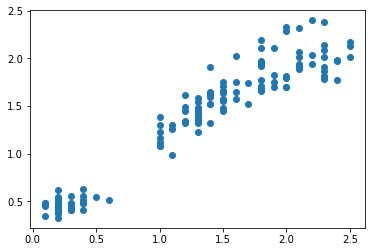

In [627]:
plt.scatter(y_train,y_pred)